In [1]:
import matplotlib.pyplot as plt
import dxchange
from fastBF2D import bilateral_numpy_fast
from fastBF3D import bilateral_numpy_fast_3D, bilateral_numpy_fast_3D_myversion, find_min_max

### 1. Load data

In [2]:
f = dxchange.read_tiff_stack(f'data/recon_00000.tiff',ind=range(16))   
mmin,mmax=find_min_max(f[0])
f[f<mmin]=mmin
f[f>mmax]=mmax

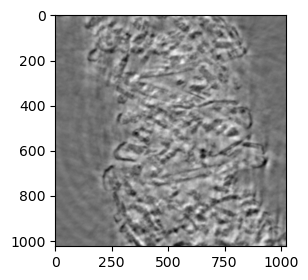

In [3]:
plt.figure(figsize = (3,3))
plt.imshow(f[0], cmap = 'gray')

### 2. Estimate sigmarange(sgmacolor) using ImageJ

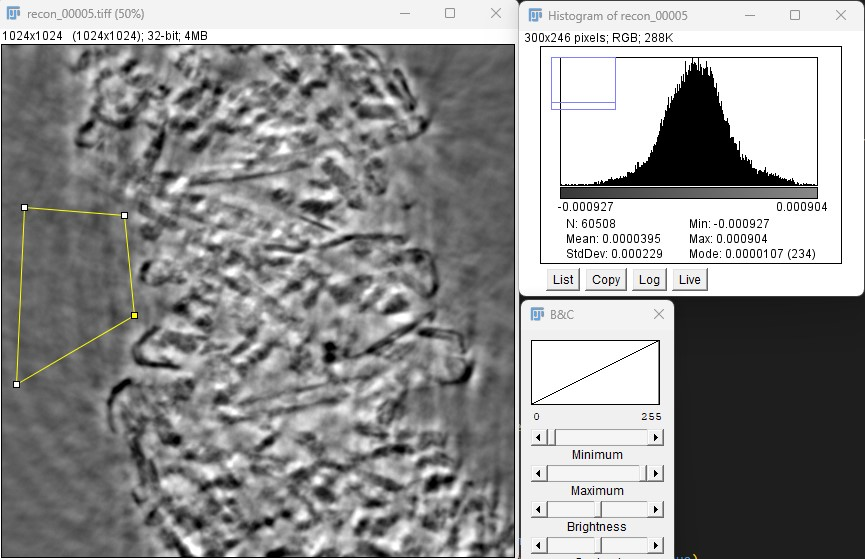

In [7]:
# sigmarange = StdDev of noise you want to blur
# if the image is not completely filtered, sigmarange value should be increased
# if the image is not  overfiltered, sigmarange value should be reduced or sigmaspatial should be increased
sigmarange = 9.29e-4

### 3. Use BF_3D

In [8]:
fr = bilateral_numpy_fast_3D(f, 40, sigmarange, samplespatial=None, samplerange=None)    

Text(0.5, 1.0, 'filtered_3D')

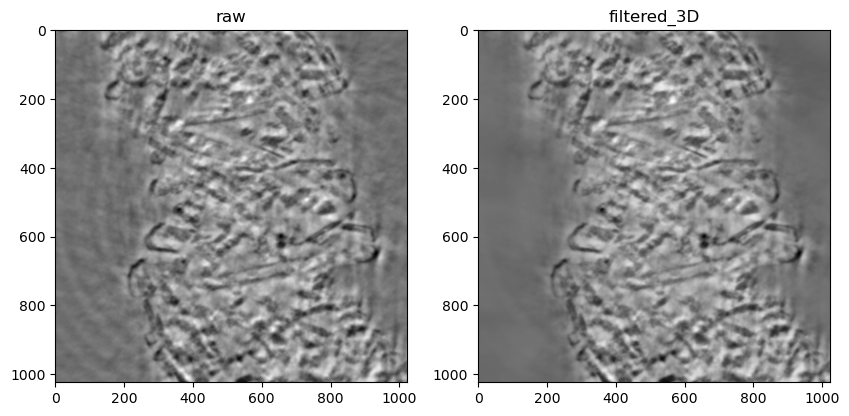

In [9]:
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(f[0], cmap = 'gray')
plt.title('raw')

plt.subplot(1,2,2)
plt.imshow(fr[0], cmap = 'gray')
plt.title('filtered_3D')